In [4]:
import numpy as np
import sys
import os
import traceback
import itertools
import pickle
import time

import scipy.weave as weave
from scipy.weave import converters

from sigvisa.infer.propose_hough import visualize_hough_array, generate_sta_hough_array

In [5]:
print sg.event_start_time

1238887580.0


78.4806


read sg


/home/dmoore/python/sigvisa/models/signal_model.py:581: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return TransientCombinedSSM(components, TSSM_NOISE_PADDING)


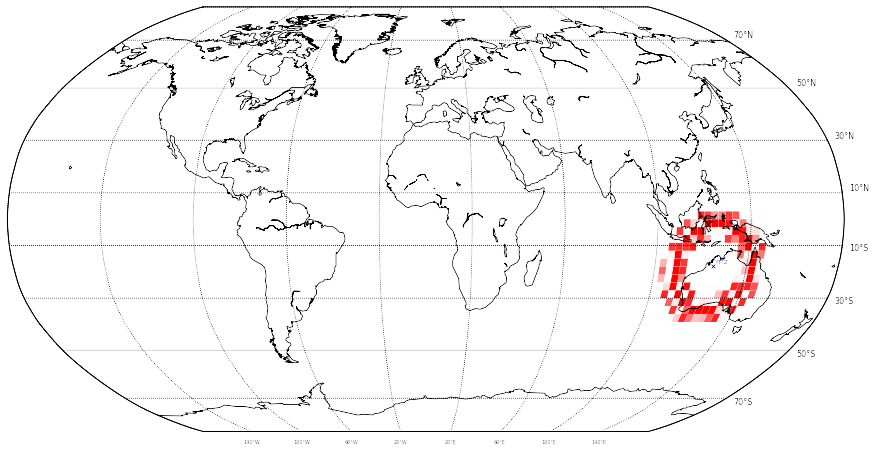

In [3]:
sfile = "/home/dmoore/python/sigvisa/logs/mcmc/02135/step_000000/pickle.sg"
with open(sfile, 'rb') as f:
    sg = pickle.load(f)
print "read sg"

DEG_WIDTH_KM = 111.32
P_WAVE_VELOCITY_KM_PER_S = 6.0

bin_width_deg=3.0
time_tick_s = (1.41 * bin_width_deg * DEG_WIDTH_KM / P_WAVE_VELOCITY_KM_PER_S)
latbins = int(180.0 / bin_width_deg)
print time_tick_s

"""
hough_array = generate_hough_array(sg, stime=sg.event_start_time, etime=sg.end_time)
fname = "hough.png"
visualize_hough_array(hough_array, sg.station_waves.keys(), fname=fname, ax=None, timeslice=None)
print "saved array to", fname
"""

#import pdb; pdb.set_trace()

sta_hough_array = None
for wns in sg.station_waves.values():
    for wn in wns:
        if wn.sta not in ("FITZ",): continue
        sta_hough_array = generate_sta_hough_array(sg, wn,
                                                   stime=sg.event_start_time,
                                                   etime=sg.end_time,
                                                   latbins=latbins,
                                                   time_tick_s=time_tick_s,
                                                   prev_array=sta_hough_array, 
                                                   phaseids=(1,5,),
                                                  uaids=(18,13))
        sta_hough_array -= np.max(sta_hough_array)
        sta_hough_array = np.exp(sta_hough_array)
        sta_hough_array /= np.max(sta_hough_array)
        f = figure(figsize=(15, 15))
        ax = f.add_subplot(111)
        
        visualize_hough_array(sta_hough_array, [wn.sta,], fname=None, ax=ax, timeslice=None)
